# Import Library

In [1]:
import pandas as pd  # Pandas untuk manipulasi dan analisis data
pd.options.mode.chained_assignment = None  # Menonaktifkan peringatan chaining
import numpy as np  # NumPy untuk komputasi numerik
import matplotlib.pyplot as plt  # Matplotlib untuk visualisasi data
import seaborn as sns  # Seaborn untuk visualisasi data statistik, mengatur gaya visualisasi
from wordcloud import WordCloud

import datetime as dt  # Manipulasi data waktu dan tanggal
import re  # Modul untuk bekerja dengan ekspresi reguler
import string  # Berisi konstanta string, seperti tanda baca
from nltk.tokenize import word_tokenize  # Tokenisasi teks
from nltk.corpus import stopwords  # Daftar kata-kata berhenti dalam teks

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia

from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks

In [2]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, LayerNormalization, BatchNormalization
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, classification_report, recall_score
from transformers import AutoTokenizer, AutoModel
import torch

In [4]:
import numpy as np, tensorflow as tf, random, os

seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)

# Loading Dataset

In [5]:
url = "https://drive.google.com/uc?id=1VDVe6wgwT78fQWXt5A8ltMccHBLcmbUO"
df = pd.read_csv(url)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,36e83b15-d884-4bf7-97a3-8ed943af0d74,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Min minta di infokan kemarin saya sudah datang...,1,0,1.2.0,2024-12-17 09:44:23,"Halo Kak Firman Yandra, maaf atas kendalanya. ...",2024-12-17 10:29:25,1.2.0
1,1e63924f-5832-4d8b-bd8f-9bd5c03d9d26,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"ganti hp, lalu install ulang wondr. saat aktif...",5,0,1.4.1,2025-07-19 06:23:14,NaN,NaN,1.4.1
2,b3b898d5-87e3-4452-ba91-6ef7edb94ab6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantapz,5,0,1.3.0,2025-02-25 04:14:16,NaN,NaN,1.3.0
3,50298145-c1a3-4072-a0fa-c45a6954dcfc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Wondr by BNI ini semakin kesini semakin simple...,5,2,1.0.2,2024-09-03 06:39:18,NaN,NaN,1.0.2
4,a641c404-c499-4bcd-8f8c-8a2906edda5c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Pembayaran Qris gagal,tpi saldo nya ke potong,...",1,0,1.2.0,2024-11-24 09:30:28,"Halo Kak Septiana Maura26, maaf atas kendala t...",2024-11-24 10:06:07,1.2.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,71115c7f-46e3-448d-8b9d-c22c7b8dec61,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ok,5,0,NaN,2025-06-26 05:01:44,NaN,NaN,NaN
4996,8fd8a720-6a68-4290-ae86-f5c2d29d7283,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya kasih 4 bintang dulu, untuk awal yg baik",4,0,1.4.1,2025-07-20 03:25:51,"Hai Kak Maning Soeparno, makasih ya udah pakai...",2025-07-20 04:24:16,1.4.1
4997,62ad3602-d0c8-40a3-99d6-7c3245ba6136,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terbantukan sekali dengan adanya aplikasi gopa...,5,1,1.3.1,2025-04-18 22:35:30,NaN,NaN,1.3.1
4998,db43ba7b-6c1f-48f7-a55b-aa1292687853,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Trimksih wondr by BNI aplikasi terbaru BNI san...,5,0,1.0.3,2024-10-30 00:07:25,Hai Kak Firdo Zazg. Terima kasih buat bintang ...,2024-10-30 00:12:02,1.0.3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              5000 non-null   object
 1   userName              5000 non-null   object
 2   userImage             5000 non-null   object
 3   content               5000 non-null   object
 4   score                 5000 non-null   int64 
 5   thumbsUpCount         5000 non-null   int64 
 6   reviewCreatedVersion  4547 non-null   object
 7   at                    5000 non-null   object
 8   replyContent          2190 non-null   object
 9   repliedAt             2190 non-null   object
 10  appVersion            4547 non-null   object
dtypes: int64(2), object(9)
memory usage: 429.8+ KB


In [7]:
# Buang kolom missing dan kolom yang tidak digunakan
df_clean = df.drop(columns=['reviewCreatedVersion', 'repliedAt', 'replyContent', 'appVersion', 'score', 'reviewId', 'userImage', 'userName'])
df_clean

,content,thumbsUpCount,at
0,Min minta di infokan kemarin saya sudah datang...,0,2024-12-17 09:44:23
1,"ganti hp, lalu install ulang wondr. saat aktif...",0,2025-07-19 06:23:14
2,mantapz,0,2025-02-25 04:14:16
3,Wondr by BNI ini semakin kesini semakin simple...,2,2024-09-03 06:39:18
4,"Pembayaran Qris gagal,tpi saldo nya ke potong,...",0,2024-11-24 09:30:28
...,...,...,...
4995,ok,0,2025-06-26 05:01:44
4996,"Saya kasih 4 bintang dulu, untuk awal yg baik",0,2025-07-20 03:25:51
4997,terbantukan sekali dengan adanya aplikasi gopa...,1,2025-04-18 22:35:30
4998,Trimksih wondr by BNI aplikasi terbaru BNI san...,0,2024-10-30 00:07:25


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        5000 non-null   object
 1   thumbsUpCount  5000 non-null   int64 
 2   at             5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


In [9]:
duplikat = df.duplicated().sum()
print(f'data dupikat mu ada {duplikat} lhooo')

data dupikat mu ada 0 lhooo


# Preprocessing

## Data Cleaning

In [10]:
df_clean

,content,thumbsUpCount,at
0,Min minta di infokan kemarin saya sudah datang...,0,2024-12-17 09:44:23
1,"ganti hp, lalu install ulang wondr. saat aktif...",0,2025-07-19 06:23:14
2,mantapz,0,2025-02-25 04:14:16
3,Wondr by BNI ini semakin kesini semakin simple...,2,2024-09-03 06:39:18
4,"Pembayaran Qris gagal,tpi saldo nya ke potong,...",0,2024-11-24 09:30:28
...,...,...,...
4995,ok,0,2025-06-26 05:01:44
4996,"Saya kasih 4 bintang dulu, untuk awal yg baik",0,2025-07-20 03:25:51
4997,terbantukan sekali dengan adanya aplikasi gopa...,1,2025-04-18 22:35:30
4998,Trimksih wondr by BNI aplikasi terbaru BNI san...,0,2024-10-30 00:07:25


In [11]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove simbol


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','nya','na','sih','ku','loh','kah','woi','woii','woy', 'dong', 'wkwk', 'haha', 'lah', 'donk'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [12]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal",
"plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong",
"pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja",
"ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo",
"ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial",
"aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam",
"aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang",
"ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi",
"banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan",
"bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang",
"bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya",
"blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu",
"bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh",
"br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat",
"btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat",
"byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi",
"caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat",
"cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih",
"ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi",
"cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall",
"cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta",
"d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan",
"diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan",
"dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat",
"dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian",
"ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak",
"enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back",
"fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa",
"gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa",
"gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila",
"gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh",
"golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan",
"gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo",
"hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong",
"hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang",
"ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya",
"ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga",
"jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak",
"k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau",
"kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena",
"kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan",
"kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau",
"kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan",
"kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu",
"kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin",
"komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan",
"krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi",
"kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan",
"lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat",
"litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta",
"low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu",
"lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan",
"magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu",
"maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi",
"mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa",
"mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi",
"munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan",
"nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ",
"narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini",
"nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku",
"ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan",
"ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah",
"ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri",
"ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini",
"nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti",
"ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil",
"nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic",
"org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar",
"pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada",
"pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi",
"penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang",
"pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah",
"polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan",
"pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor",
"re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika",
"rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya",
"salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut",
"sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju",
"sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat",
"shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja",
"skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai",
"smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf",
"sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap",
"stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu",
"td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman",
"tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun",
"tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah",
"tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai",
"toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus",
"trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu",
"u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya",
"usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer",
"warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya",
"yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya",
"7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja",
"ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama",
"ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa",
"aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik",
"astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang",
"ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden",
"bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang",
"bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget",
"beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan",
"bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung",
"bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu",
"bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok",
"bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan",
"byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam",
"cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek",
"ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali",
"cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu",
"gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman",
"gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo",
"helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat",
"hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka",
"imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya",
"jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan",
"jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian",
"kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban",
"kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu",
"kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya",
"keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang",
"kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak",
"klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan",
"knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal",
"koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya",
"kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia",
"lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat",
"linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum",
"loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat",
"maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main",
"mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan",
"manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin",
"mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede",
"mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja",
"mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf",
"muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri",
"nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa",
"ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh",
"ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar",
"ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap",
"ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini",
"nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok",
"priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai",
"raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal",
"sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda",
"sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa",
"tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi",
"telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal",
"thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon",
"tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap",
"tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik",
"reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar",
"sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi",
"hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat",
"still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama",
"faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah",
"most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut",
"waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu",
"jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang",
"koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia",
"tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa",
"ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin", 'min': 'admin', 'mantapz': 'mantap', 'mantab': 'mantap', 'good': 'bagus',
'app': 'aplikasi', 'sdh': 'sudah', 'ok': 'oke', 'simple': 'mudah', 'simpel': 'mudah', 'smpl': 'mudah', 'top': 'bagus', 'apk': 'aplikasi', 'gk': 'tidak',
'gabisa': 'tidak bisa', 'hp': 'handphone', 'perfect': 'sempurna', 'mantul': 'mantap', 'best': 'bagus', 'fast': 'cepat', 'mantapp': 'mantap', 'bgus': 'bagus',
'josss': 'mantap', 'bagusss': 'bagus', 'jos': 'bagus', 'baguss': 'bagus', 'login': 'masuk', 'tf': 'transfer', 'trus': 'terus', 'trimksih': 'terima kasih',
'sanget': 'sangat', 'dlm': 'dalam', 'transaksinyatq': 'transaksinya', 'doang': 'aja', 'kali': 'mungkin', 'gasken': 'langsung', 'hallo': 'halo', 'nyoba': 'coba',
'ktnya': 'katanya', 'skrng': 'sekarang', 'user': 'pengguna', 'interface': 'antar muka', 'easy': 'mudah', 'use': 'digunakan', 'free': 'gratis', 'klu': 'kalau',
'bagu': 'bagus', 'wonder': 'wondr', 'tdkdpt': 'tidak dapat', 'sblumnya': 'sebelumnya', 'apknya': 'aplikasi', 'transsaksi': 'transaksi', 'deh': 'saja', 'mohonn': 'mohon',
'notif': 'notifikasi', 'dg': 'dengan', 'apl': 'aplikasi', 'kartunya': 'kartu', 'banking': 'mobile banking', 'aplikasinya': 'aplikasi', 'memasukan': 'memasukkan',
'banget': 'sekali', 'gacorr': 'lancar', 'tranfer': 'transfer', 'eui': 'sekali', 'repot': 'sulit', 'penggunannya': 'penggunaannya', 'terupdate': 'terbaru', 'ribet': 'sulit',
'ewalet': 'ewallet', 'g': 'tidak', 'bisako': 'bisa', 'wndr': 'wondr', 'donk': 'lah', 'dong': 'lah', 'aja': 'saja', 'banget': 'sekali', 'udh': 'sudah', 'update': 'terbaru',
'transaksinya': 'transaksi', 'aplikasiga bisa': 'aplikasi gabisa', 'gak': 'tidak', 'ga': 'tidak'}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [13]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df_clean['text_clean'] = df_clean['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df_clean['text_casefoldingText'] = df_clean['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df_clean['text_slangwords'] = df_clean['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df_clean['text_tokenizingText'] = df_clean['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df_clean['text_stopword'] = df_clean['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df_clean['text_akhir'] = df_clean['text_stopword'].apply(toSentence)

In [14]:
df_clean

,content,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Min minta di infokan kemarin saya sudah datang...,0,2024-12-17 09:44:23,Min minta di infokan kemarin saya sudah datang...,min minta di infokan kemarin saya sudah datang...,admin minta di infokan kemarin saya sudah data...,"[admin, minta, di, infokan, kemarin, saya, sud...","[admin, infokan, kemarin, cabang, bni, ganti, ...",admin infokan kemarin cabang bni ganti kartu e...
1,"ganti hp, lalu install ulang wondr. saat aktif...",0,2025-07-19 06:23:14,ganti hp lalu install ulang wondr saat aktifas...,ganti hp lalu install ulang wondr saat aktifas...,ganti handphone lalu install ulang wondr saat ...,"[ganti, handphone, lalu, install, ulang, wondr...","[ganti, handphone, install, ulang, wondr, akti...",ganti handphone install ulang wondr aktifasi s...
2,mantapz,0,2025-02-25 04:14:16,mantapz,mantapz,mantap,[mantap],[mantap],mantap
3,Wondr by BNI ini semakin kesini semakin simple...,2,2024-09-03 06:39:18,Wondr by BNI ini semakin kesini semakin simple...,wondr by bni ini semakin kesini semakin simple...,wondr by bni ini semakin kesini semakin mudah ...,"[wondr, by, bni, ini, semakin, kesini, semakin...","[wondr, bni, kesini, mudah, penggunaannya, men...",wondr bni kesini mudah penggunaannya menu dise...
4,"Pembayaran Qris gagal,tpi saldo nya ke potong,...",0,2024-11-24 09:30:28,Pembayaran Qris gagaltpi saldo nya ke potongdi...,pembayaran qris gagaltpi saldo nya ke potongdi...,pembayaran qris gagaltpi saldo nya ke potongdi...,"[pembayaran, qris, gagaltpi, saldo, nya, ke, p...","[pembayaran, qris, gagaltpi, saldo, potongdi, ...",pembayaran qris gagaltpi saldo potongdi email ...
...,...,...,...,...,...,...,...,...,...
4995,ok,0,2025-06-26 05:01:44,ok,ok,oke,[oke],[oke],oke
4996,"Saya kasih 4 bintang dulu, untuk awal yg baik",0,2025-07-20 03:25:51,Saya kasih bintang dulu untuk awal yg baik,saya kasih bintang dulu untuk awal yg baik,saya kasih bintang dulu untuk awal yang baik,"[saya, kasih, bintang, dulu, untuk, awal, yang...","[kasih, bintang]",kasih bintang
4997,terbantukan sekali dengan adanya aplikasi gopa...,1,2025-04-18 22:35:30,terbantukan sekali dengan adanya aplikasi gopa...,terbantukan sekali dengan adanya aplikasi gopa...,terbantukan sekali dengan adanya aplikasi gopa...,"[terbantukan, sekali, dengan, adanya, aplikasi...","[terbantukan, aplikasi, gopay, semoga, bagus]",terbantukan aplikasi gopay semoga bagus
4998,Trimksih wondr by BNI aplikasi terbaru BNI san...,0,2024-10-30 00:07:25,Trimksih wondr by BNI aplikasi terbaru BNI san...,trimksih wondr by bni aplikasi terbaru bni san...,terima kasih wondr by bni aplikasi terbaru bni...,"[terima, kasih, wondr, by, bni, aplikasi, terb...","[terima, kasih, wondr, bni, aplikasi, terbaru,...",terima kasih wondr bni aplikasi terbaru bni me...


## Pelabelan

In [15]:
lexicon_positive = {
    "bagus": 1,
    "baik": 1,
    "keren": 2,
    "mantap": 2,
    "cepat": 1,
    "mudah": 1,
    "stabil": 1,
    "lengkap": 1,
    "ok": 1,
    "puas": 2,
    "oke": 1,
    "membantu": 2,
    "terbaik": 3,
    "lancar": 2,
    "berguna": 2,
    "recommended": 2,
    "nyaman": 1,
    "aman": 1,
    "praktis": 1,
    "bagus banget": 3,
    "suka": 2,
    "top": 2,
    "wow": 2,
    "hebat": 2,
    "bagus sekali": 3,
    "responsif": 2,
    "mudah digunakan": 2,
    "memuaskan": 3,
    "bisa": 1,
}

lexicon_negative = {
    "buruk": -1,
    "jelek": -1,
    "lemot": -2,
    "error": -2,
    "macet": -1,
    "crash": -2,
    "gagal": -2,
    "susah": -1,
    "bug": -2,
    "kecewa": -2,
    "jelek": -3,
    "buruk": -3,
    "lemot": -4,
    "lambat": -3,
    "error": -4,
    "bohong": -3,
    "crash": -5,
    "mengecewakan": -5,
    "parah": -4,
    "sampah": -5,
    "ngehang": -4,
    "keluar sendiri": -4,
    "tidak": -2,
    "bohong": -3,
    "sulit": -2,
    "ga bisa": -3,
    "tidak bisa": -3,
    "gabisa": -3,
    "login gagal": -4,
    "lemot banget": -4,
    "tidak berfungsi": -4,
    "force close": -5,
    "tidak jalan": -3,
    "hang": -4,
    "sering error": -4,
    "lemot sekali": -4,
    "lag": -3,
    "buggy": -3,
    "menyebalkan": -3,
    "payah": -4,
    "nggak bisa": -3,
    "gak bisa": -3,
}

lexicon_neutral = {
    "aplikasi": 0,
    "fitur": 0,
    "menu": 0,
    "layanan": 0,
    "akun": 0,
    "update": 0,
    "versi": 0,
    "bni": 0,
    "transaksi": 0,
    "wondr": 0,
    "masuk": 0,
    "mobile": 0,
    "pakai": 0,
    "login": 0,
    "daftar": 0,
    "install": 0,
    "register": 0,
    "fiturnya": 0,
    "ui": 0,
    "ux": 0,
    "tampilan": 0,
    "desain": 0,
    "menu utama": 0,
    "navigasi": 0,
    "transaksi": 0,
    "saldo": 0,
    "apdet": 0,
    "versi baru": 0,
    'kartu': 0,
    'wajah': 0,
    'rekening': 0,
    'verifikasi': 0
}

In [16]:
def sentiment_analysis_lexicon_indonesia(text):
    text = text.lower()
    score = 0

    # Hitung berdasarkan kata
    for word in text.split():
        if word in lexicon_positive:
            score += lexicon_positive[word]
        elif word in lexicon_negative:
            score += lexicon_negative[word]
        elif word in lexicon_neutral:
            score += lexicon_neutral[word]

    # Tentukan polaritas akhir
    if score > 0:
        polarity = "positif"
    elif score < 0:
        polarity = "negatif"
    else:
        polarity = "netral"

    return score, polarity

In [17]:
results = df_clean['text_akhir'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df_clean['polarity_score'] = results[0]
df_clean['polarity'] = results[1]
print(df_clean['polarity'].value_counts())

polarity
positif    2811
netral     1627
negatif     562
Name: count, dtype: int64


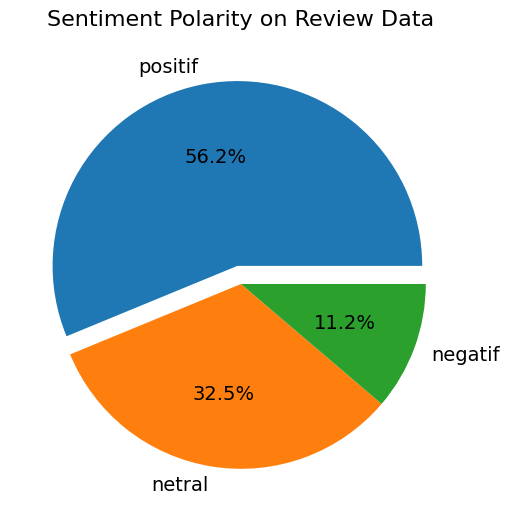

In [18]:
# Membuat objek gambar dan sumbu dengan ukuran (6, 6) inci.
fig, ax = plt.subplots(figsize=(6, 6))

# Mengambil jumlah data polaritas sentimen dari DataFrame 'df_clean' dan menyimpannya dalam list 'sizes'.
sizes = [count for count in df_clean['polarity'].value_counts()]

# Mengambil label atau kategori sentimen dari DataFrame 'df_clean' dan menyimpannya dalam list 'labels'.
labels = list(df_clean['polarity'].value_counts().index)

# Menentukan seberapa jauh potongan dari pie chart akan ditarik (0.1 artinya potongan pertama akan sedikit terpisah).
explode = (0.1, 0, 0) # Updated explode to match the number of slices

# Membuat pie chart dengan data 'sizes', 'labels', dan 'explode' yang telah ditentukan.
# Autopct digunakan untuk menampilkan persentase di dalam setiap potongan pie.
# Textprops digunakan untuk mengatur ukuran font teks dalam pie chart.
ax.pie(x=sizes, labels=labels, autopct='%1.1f%%', explode=explode, textprops={'fontsize': 14})

# Menetapkan judul untuk pie chart dengan ukuran font dan jarak (padding) tertentu.
ax.set_title('Sentiment Polarity on Review Data', fontsize=16, pad=20)

# Menampilkan pie chart.
plt.show()

In [19]:
pd.set_option('display.max_colwidth', 5000)

# Positive reviews
positive_review = df_clean[df_clean['polarity'] == 'positive'][['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_review = positive_review.sort_values(by='polarity_score', ascending=False).reset_index(drop=True)
positive_review.index += 1

# Neutral reviews
neutral_review = df_clean[df_clean['polarity'] == 'neutral'][['text_akhir', 'polarity_score', 'polarity','text_stopword']]
neutral_review = neutral_review.sort_values(by='polarity_score', ascending=False).reset_index(drop=True)
neutral_review.index += 1

# Negative reviews
negative_review = df_clean[df_clean['polarity'] == 'negative'][['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_review = negative_review.sort_values(by='polarity_score', ascending=True).reset_index(drop=True)  # urutan kecil -> besar
negative_review.index += 1

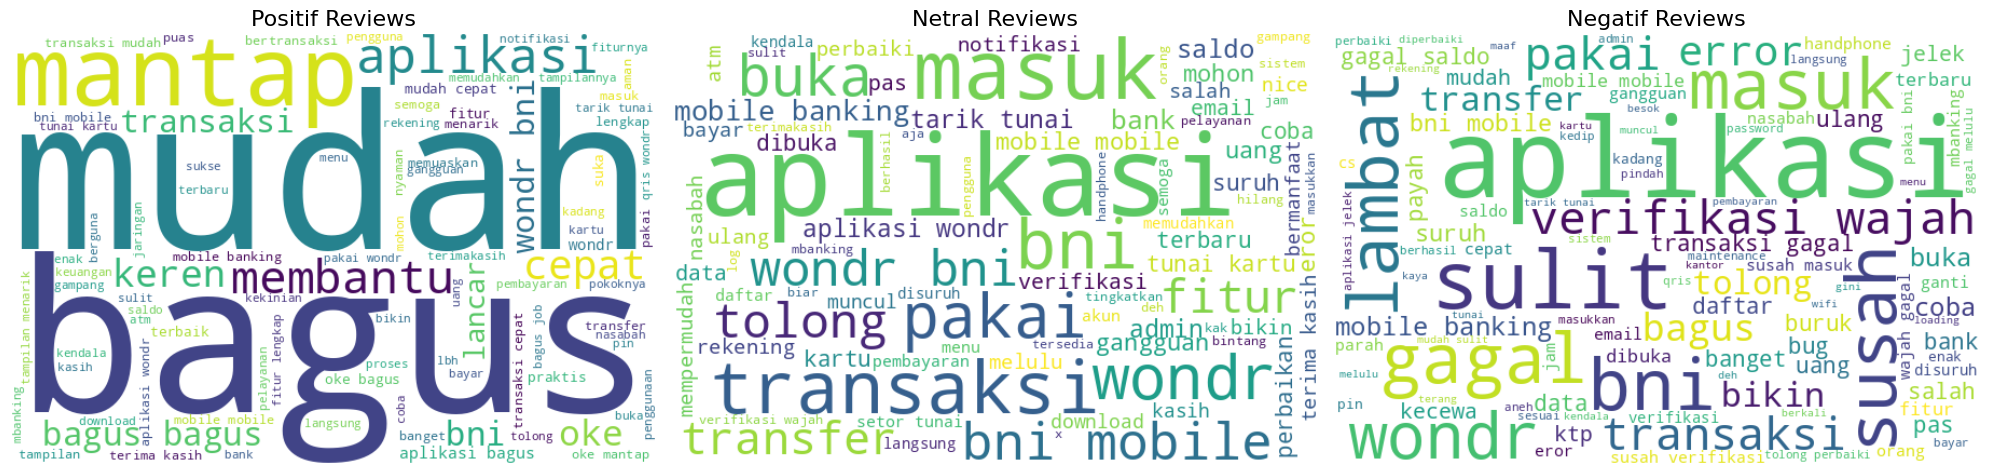

In [20]:
def plot_wordcloud_sentiment(df):
    sentiments = ['positif', 'netral', 'negatif']
    fig, axes = plt.subplots(1, 3, figsize=(20,8))

    for i, sentiment in enumerate(sentiments):
        # Filter df sesuai sentimen
        df_sent = df[df['polarity'] == sentiment]

        # Gabungkan semua kata menjadi 1 string
        list_words = ' '.join(df_sent['text_akhir'])

        # Check if there are any words before generating the word cloud
        if not list_words.strip():  # Check for empty or whitespace-only string
            print(f"Skipping word cloud generation for {sentiment} reviews: No words found after preprocessing.")
            axes[i].set_title(f'{sentiment.capitalize()} Reviews (No words)')
            axes[i].axis('off') # Hide the axes for empty subplots
            continue

        # Buat WordCloud
        wordcloud = WordCloud(
            width=600,
            height=400,
            background_color='white',
            min_font_size=10
        ).generate(list_words)

        # Plot in subplot
        axes[i].imshow(wordcloud, interpolation='bilinear')
        axes[i].axis('off')
        axes[i].set_title(f'{sentiment.capitalize()} Reviews', fontsize=16)

    plt.tight_layout()
    plt.show()

plot_wordcloud_sentiment(df_clean)

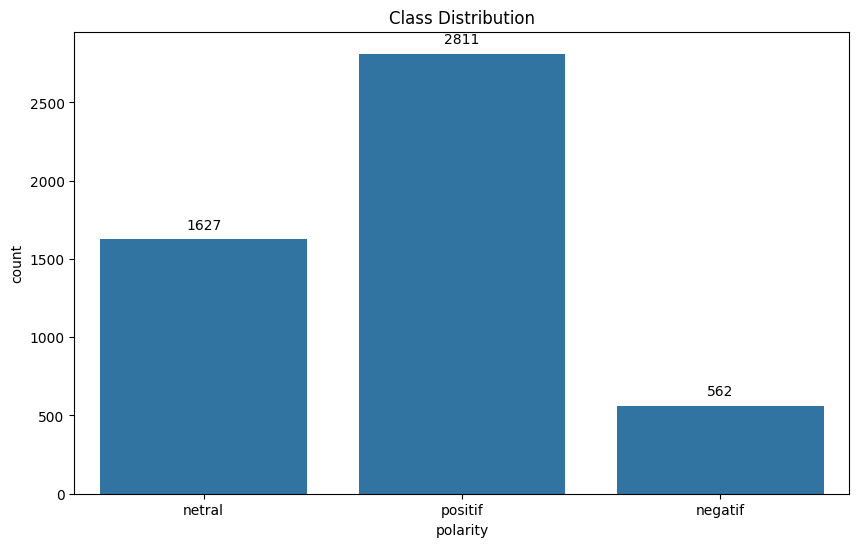

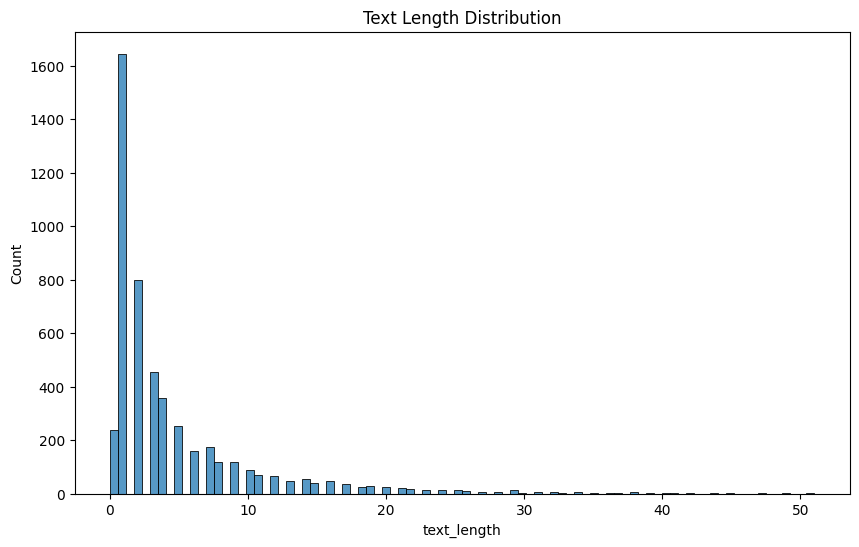

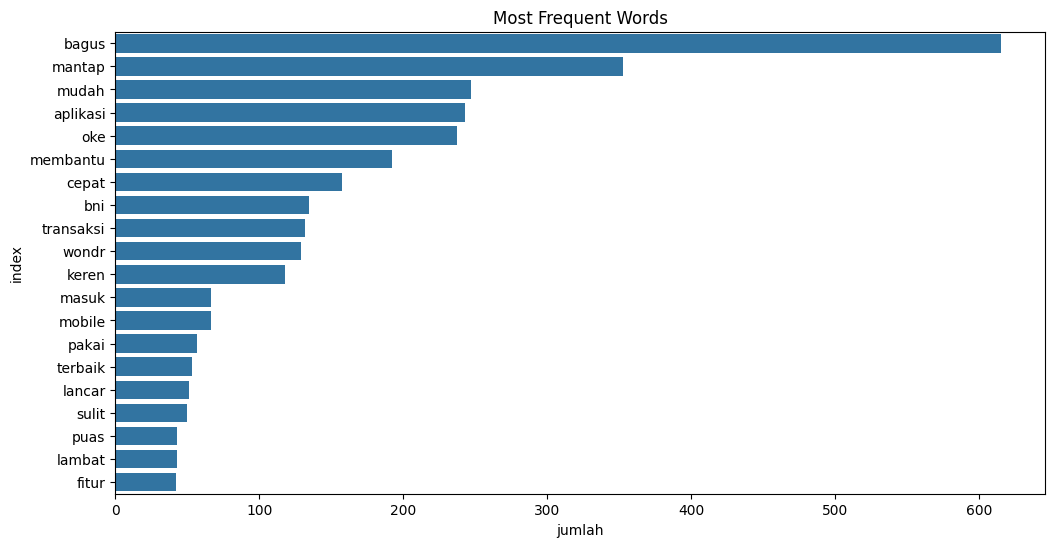

In [21]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Check class distribution
class_dist_plot = sns.countplot(x='polarity', data=df_clean)
plt.title('Class Distribution')

# Add counts above the bars on the plot
for p in class_dist_plot.patches:
    class_dist_plot.annotate(format(p.get_height(), '.0f'),
                              (p.get_x() + p.get_width() / 2., p.get_height()),
                              ha='center', va='center',
                              xytext=(0, 10),
                              textcoords='offset points')

plt.show()

# Set the figure size
plt.figure(figsize=(10, 6))

# Visualize text length distribution
df_clean['text_length'] = df_clean['text_akhir'].apply(lambda x: len(x.split()))
sns.histplot(df_clean['text_length'])
plt.title('Text Length Distribution')
plt.show()

# Set the figure size
plt.figure(figsize=(12, 6))

# Visualize most frequent words
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_clean['text_akhir'])
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df = tfidf_df.sum().reset_index(name='jumlah')
tfidf_df = tfidf_df.sort_values('jumlah', ascending=False).head(20)
sns.barplot(x='jumlah', y='index', data=tfidf_df)
plt.title('Most Frequent Words')
plt.show()

# Pemodelan


## TF-IDF 80/20

### Data Splitting

In [22]:
# Pisahkan data menjadi fitur (review) dan label (sentimen)
X = df_clean['text_akhir']
y = df_clean['polarity']

In [23]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(ngram_range = (1,2), max_features=8000, min_df=3, max_df=0.9)
X_tfidf = tfidf.fit_transform(X)

In [24]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,account,adakan,admin,admin aplikasi,admin kartu,administrasi,adminnya,ah,air,aja,...,wondr wondr,wondrby,wondrby bni,ya,yaaa,yah,yes,yh,youtube,zaman
0,0.0,0.0,0.46072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# Encode label (string -> angka)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # misal: negative=0, neutral=1, positive=2

# Convert sparse matrix ke dense array
X_dense = X_tfidf.toarray()

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_dense, y_encoded, test_size=0.2, random_state=seed, stratify=y_encoded
)

# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=seed)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


print("Sebelum SMOTE:\n", pd.Series(y_train).value_counts())
print("Sesudah SMOTE:\n", pd.Series(y_train_res).value_counts())

Sebelum SMOTE:
 2    2249
1    1302
0     449
Name: count, dtype: int64
Sesudah SMOTE:
 2    2249
1    2249
0    2249
Name: count, dtype: int64


### Model Deep Learning

In [26]:
df_clean.head(2)

,content,thumbsUpCount,at,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity,text_length
0,Min minta di infokan kemarin saya sudah datang ke cabang BNI supaya ganti kartu expayed Sampai sana di suruh pulangnya sama orang BNInya Woy duit gue ada di sana masa mau narik uang harus lewat atm lain Mending kalau nggk kena admin ini kena admin Terus di saranin sama mereka kalau pengen aktifkan yg sudah expayed di suruh ke tengah kota Mbok kira di sini emangnya sempat kesana,0,2024-12-17 09:44:23,Min minta di infokan kemarin saya sudah datang ke cabang BNI supaya ganti kartu expayed Sampai sana di suruh pulangnya sama orang BNInya Woy duit gue ada di sana masa mau narik uang harus lewat atm lain Mending kalau nggk kena admin ini kena admin Terus di saranin sama mereka kalau pengen aktifkan yg sudah expayed di suruh ke tengah kota Mbok kira di sini emangnya sempat kesana,min minta di infokan kemarin saya sudah datang ke cabang bni supaya ganti kartu expayed sampai sana di suruh pulangnya sama orang bninya woy duit gue ada di sana masa mau narik uang harus lewat atm lain mending kalau nggk kena admin ini kena admin terus di saranin sama mereka kalau pengen aktifkan yg sudah expayed di suruh ke tengah kota mbok kira di sini emangnya sempat kesana,admin minta di infokan kemarin saya sudah datang ke cabang bni supaya ganti kartu expayed sampai sana di suruh pulangnya sama orang bninya woy duit saya ada di sana masa mau narik uang harus lewat atm lain lebih baik kalau nggk kena admin ini kena admin terus di saranin sama mereka kalau pengen aktifkan yang sudah expayed di suruh ke tengah kota mbok kira di sini memangnya sempat kesana,"[admin, minta, di, infokan, kemarin, saya, sudah, datang, ke, cabang, bni, supaya, ganti, kartu, expayed, sampai, sana, di, suruh, pulangnya, sama, orang, bninya, woy, duit, saya, ada, di, sana, masa, mau, narik, uang, harus, lewat, atm, lain, lebih, baik, kalau, nggk, kena, admin, ini, kena, admin, terus, di, saranin, sama, mereka, kalau, pengen, aktifkan, yang, sudah, expayed, di, suruh, ke, tengah, kota, mbok, kira, di, sini, memangnya, sempat, kesana]","[admin, infokan, kemarin, cabang, bni, ganti, kartu, expayed, suruh, pulangnya, orang, bninya, duit, narik, uang, atm, nggk, kena, admin, kena, admin, saranin, pengen, aktifkan, expayed, suruh, kota, mbok, memangnya, kesana]",admin infokan kemarin cabang bni ganti kartu expayed suruh pulangnya orang bninya duit narik uang atm nggk kena admin kena admin saranin pengen aktifkan expayed suruh kota mbok memangnya kesana,0,netral,30
1,"ganti hp, lalu install ulang wondr. saat aktifasi sidik jari selalu force close. setelah install ulang aman",0,2025-07-19 06:23:14,ganti hp lalu install ulang wondr saat aktifasi sidik jari selalu force close setelah install ulang aman,ganti hp lalu install ulang wondr saat aktifasi sidik jari selalu force close setelah install ulang aman,ganti handphone lalu install ulang wondr saat aktifasi sidik jari selalu force close setelah install ulang aman,"[ganti, handphone, lalu, install, ulang, wondr, saat, aktifasi, sidik, jari, selalu, force, close, setelah, install, ulang, aman]","[ganti, handphone, install, ulang, wondr, aktifasi, sidik, jari, force, close, install, ulang, aman]",ganti handphone install ulang wondr aktifasi sidik jari force close install ulang aman,1,positif,13


In [27]:
model = Sequential([
    Input(shape=(X_train_res.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.55),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.45),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.35),
    Dense(3, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamW',
              metrics=['accuracy'])

In [28]:
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

model.fit(
    X_train_res, y_train_res,
    validation_split=0.15,
    epochs=150,
    batch_size=32,
    callbacks=[es, reduce_lr],
    verbose=1
)

Epoch 1/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.6399 - loss: 3.3691 - val_accuracy: 0.9348 - val_loss: 2.2467 - learning_rate: 0.0010
Epoch 2/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9081 - loss: 1.9373 - val_accuracy: 0.9753 - val_loss: 1.6603 - learning_rate: 0.0010
Epoch 3/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9498 - loss: 1.4925 - val_accuracy: 0.9941 - val_loss: 1.1983 - learning_rate: 0.0010
Epoch 4/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9666 - loss: 1.1582 - val_accuracy: 0.9951 - val_loss: 0.8912 - learning_rate: 0.0010
Epoch 5/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9679 - loss: 0.9273 - val_accuracy: 0.9970 - val_loss: 0.7133 - learning_rate: 0.0010
Epoch 6/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.9735 - loss: 0.7370 - val_accuracy: 0.9990 - val_loss: 0.5790 - learning_rate: 0.0010
Epoch 7/150
180/180 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9723 - loss

=== ini evaluasi training set ===
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 1.0000 - loss: 0.0132
Loss: 0.0135, Accuracy: 0.9999

=== ini adalah evaluasi test set ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9748 - loss: 0.1654
Loss: 0.1600, Accuracy: 0.9750
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.93      0.93      0.93       113
      Netral       0.97      0.97      0.97       325
     Positif       0.99      0.99      0.99       562

    accuracy                           0.97      1000
   macro avg       0.96      0.96      0.96      1000
weighted avg       0.98      0.97      0.98      1000



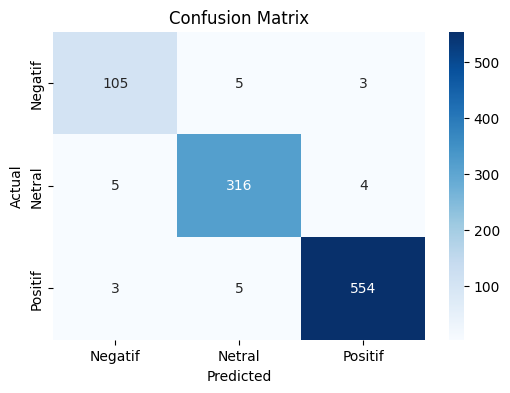

In [29]:
print('=== ini evaluasi training set ===')
loss, acc = model.evaluate(X_train_res, y_train_res, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

print('\n=== ini adalah evaluasi test set ===')
loss, acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# Prediksi probabilitas
y_pred = model.predict(X_test)

# Ambil kelas prediksi (index probabilitas terbesar)
y_pred_classes = y_pred.argmax(axis=1)

# Ground truth (sudah dalam bentuk label integer)
y_true_classes = y_test

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=['Negatif', 'Netral', 'Positif']
))

# Confusion matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif','Netral','Positif'],
            yticklabels=['Negatif','Netral','Positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [30]:
# === Input kalimat baru ===
kalimat_baru = input("Masukkan kalimat baru: ")

# === Preprocessing sesuai pipeline ===
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# === Prediksi dengan model ===
X_kalimat_baru = tfidf.transform([kalimat_baru_final])
prediksi_sentimen = model.predict(X_kalimat_baru)
predicted_class_index = np.argmax(prediksi_sentimen, axis=1)[0]
predicted_sentiment_label = le.inverse_transform([predicted_class_index])[0]

kalimat_asli = kalimat_baru.lower()
words = kalimat_asli.split()
if any(neg in kalimat_asli for neg in ["tidak", "gak", "nggak", "bukan", "tak"]):
    # Negasi + kata positif → negatif
    if any(pos in kalimat_asli for pos in lexicon_positive):
        predicted_sentiment_label = "negatif"
    # Negasi + kata negatif → positif
    elif any(neg_word in kalimat_asli for neg_word in lexicon_negative):
        predicted_sentiment_label = "positif"
    # Negasi + kata netral (misal 'login', 'fitur', 'aplikasi') → negatif
    elif any(neu in kalimat_asli for neu in lexicon_neutral):
        predicted_sentiment_label = "negatif"

# === Output hasil ===
print(f"Sentimen kalimat baru adalah {predicted_sentiment_label.upper()}.")

Masukkan kalimat baru: APL
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
Sentimen kalimat baru adalah NETRAL.


## IndoBert 80/20




### Data Splitting

In [31]:
tokenizer = AutoTokenizer.from_pretrained("indobenchmark/indobert-base-p2")
bert_model = AutoModel.from_pretrained("indobenchmark/indobert-base-p2")

def get_bert_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]
        inputs = tokenizer(batch_texts, return_tensors='pt', truncation=True, padding=True, max_length=128)
        with torch.no_grad():
            outputs = bert_model(**inputs)
        batch_embeds = outputs.last_hidden_state[:, 0, :].detach().numpy()
        all_embeddings.append(batch_embeds)
    return np.vstack(all_embeddings)

X_bert = get_bert_embeddings(X.tolist())

# Split data
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(
    X_bert, y_encoded, test_size=0.2, random_state=seed, stratify=y_encoded
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


### Model Deep Learning

In [32]:
model_bert = Sequential([
    Input(shape=(X_train_bert.shape[1],)),
    LayerNormalization(),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.55),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.45),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.35),
    Dense(3, activation='softmax')
])

model_bert.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.AdamW(learning_rate=2e-4, weight_decay=1e-5),
              metrics=['accuracy'])

In [33]:
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6, patience=2, min_lr=1e-6)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(y_train_bert), y=y_train_bert)
class_weights = dict(enumerate(class_weights))

model_bert.fit(
    X_train_bert, y_train_bert,
    validation_split=0.25,
    epochs=150,
    batch_size=16,
    class_weight=class_weights,
    callbacks=[es, reduce_lr],
    verbose=1
)

Epoch 1/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.4245 - loss: 4.6993 - val_accuracy: 0.7170 - val_loss: 3.7770 - learning_rate: 2.0000e-04
Epoch 2/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5975 - loss: 4.1544 - val_accuracy: 0.7710 - val_loss: 3.6368 - learning_rate: 2.0000e-04
Epoch 3/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6514 - loss: 3.8948 - val_accuracy: 0.7940 - val_loss: 3.5116 - learning_rate: 2.0000e-04
Epoch 4/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6826 - loss: 3.7723 - val_accuracy: 0.8150 - val_loss: 3.3847 - learning_rate: 2.0000e-04
Epoch 5/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7277 - loss: 3.6302 - val_accuracy: 0.8260 - val_loss: 3.2745 - learning_rate: 2.0000e-04
Epoch 6/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7525 - loss: 3.5194 - val_accuracy: 0.8330 - val_loss: 3.1945 - learning_rate: 2.0000e-04
Epoch 7/150
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - a

=== ini evaluasi training set ===
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9523 - loss: 0.4044
Loss: 0.4483, Accuracy: 0.9345

=== ini adalah evaluasi test set ===
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8917 - loss: 0.5758
Loss: 0.5576, Accuracy: 0.9030
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.72      0.85      0.78       113
      Netral       0.88      0.87      0.88       325
     Positif       0.96      0.93      0.95       562

    accuracy                           0.90      1000
   macro avg       0.85      0.88      0.87      1000
weighted avg       0.91      0.90      0.90      1000



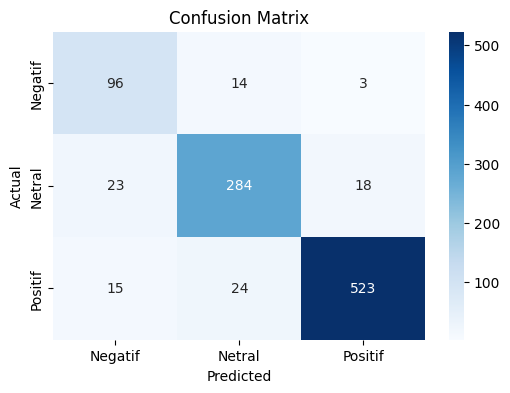

In [34]:
print('=== ini evaluasi training set ===')
loss, acc = model_bert.evaluate(X_train_bert, y_train_bert, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

print('\n=== ini adalah evaluasi test set ===')
loss, acc = model_bert.evaluate(X_test_bert, y_test_bert, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# Prediksi probabilitas
y_pred = model_bert.predict(X_test_bert)

# Ambil kelas prediksi (index probabilitas terbesar)
y_pred_classes = y_pred.argmax(axis=1)

# Ground truth (sudah dalam bentuk label integer)
y_true_classes = y_test_bert

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=['Negatif', 'Netral', 'Positif']
))

# Confusion matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif','Netral','Positif'],
            yticklabels=['Negatif','Netral','Positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [35]:
# === Input kalimat baru ===
kalimat_baru = input("Masukkan kalimat baru: ")

# === Lakukan preprocessing seperti di training ===
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# === Buat embedding dengan tokenizer dan model BERT ===
inputs = tokenizer(
    [kalimat_baru_final],
    return_tensors='pt',
    truncation=True,
    padding=True,
    max_length=128
)

with torch.no_grad():
    outputs = bert_model(**inputs)
    embed_baru = outputs.last_hidden_state[:, 0, :].detach().numpy()

# === Gunakan model neural network untuk prediksi ===
prediksi_prob = model_bert.predict(embed_baru)
prediksi_kelas = np.argmax(prediksi_prob, axis=1)[0]

# === Tampilkan hasil ===
label_map = {0: 'Negatif', 1: 'Netral', 2: 'Positif'}
print(f"Sentimen kalimat baru adalah {label_map[prediksi_kelas].upper()}.")

Masukkan kalimat baru: apk
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step
Sentimen kalimat baru adalah NETRAL.


## TF-IDF 70/30

### Data Splitting

In [36]:
# Encode label (string -> angka)
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # misal: negative=0, neutral=1, positive=2

# Convert sparse matrix ke dense array
X_dense = X_tfidf.toarray()

# Split data
X_train_tfidf70, X_test_tfidf70, y_train_tfidf70, y_test_tfidf70 = train_test_split(
    X_dense, y_encoded, test_size=0.3, random_state=seed, stratify=y_encoded
)

# Terapkan SMOTE hanya ke data latih
smote = SMOTE(random_state=seed)
X_train_res_tfidf70, y_train_res_tfidf70 = smote.fit_resample(X_train_tfidf70, y_train_tfidf70)


print("Sebelum SMOTE:\n", pd.Series(y_train_tfidf70).value_counts())
print("Sesudah SMOTE:\n", pd.Series(y_train_res_tfidf70).value_counts())

Sebelum SMOTE:
 2    1968
1    1139
0     393
Name: count, dtype: int64
Sesudah SMOTE:
 1    1968
2    1968
0    1968
Name: count, dtype: int64


### Model Deep Learning

In [37]:
model_tfidf70 = Sequential([
    Input(shape=(X_train_res_tfidf70.shape[1],)),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.55),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.45),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)),
    BatchNormalization(momentum=0.99),
    Dropout(0.35),
    Dense(3, activation='softmax')
])

model_tfidf70.compile(loss='sparse_categorical_crossentropy',
              optimizer='adamW',
              metrics=['accuracy'])

In [38]:
es = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

model_tfidf70.fit(
    X_train_res_tfidf70, y_train_res_tfidf70,
    validation_split=0.15,
    epochs=150,
    batch_size=32,
    callbacks=[es, reduce_lr],
    verbose=1
)

Epoch 1/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.6015 - loss: 3.4727 - val_accuracy: 0.0485 - val_loss: 2.8710 - learning_rate: 0.0010
Epoch 2/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9023 - loss: 1.9821 - val_accuracy: 0.0632 - val_loss: 2.5483 - learning_rate: 0.0010
Epoch 3/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9543 - loss: 1.5112 - val_accuracy: 0.9729 - val_loss: 1.4876 - learning_rate: 0.0010
Epoch 4/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9647 - loss: 1.1960 - val_accuracy: 0.9898 - val_loss: 0.9986 - learning_rate: 0.0010
Epoch 5/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9781 - loss: 0.9391 - val_accuracy: 0.9977 - val_loss: 0.7368 - learning_rate: 0.0010
Epoch 6/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9813 - loss: 0.7343 - val_accuracy: 0.9955 - val_loss: 0.5970 - learning_rate: 0.0010
Epoch 7/150
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9793 - loss: 

=== ini evaluasi training set ===
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0132
Loss: 0.0133, Accuracy: 0.9998

=== ini adalah evaluasi test set ===
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9856 - loss: 0.1218
Loss: 0.1110, Accuracy: 0.9833
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.92      0.92      0.92       169
      Netral       0.96      0.98      0.97       488
     Positif       0.99      0.98      0.99       843

    accuracy                           0.97      1500
   macro avg       0.96      0.96      0.96      1500
weighted avg       0.97      0.97      0.97      1500



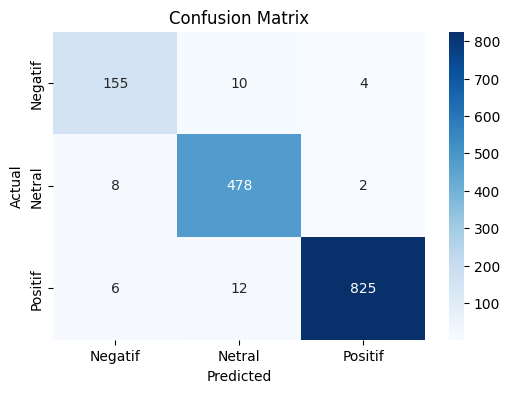

In [39]:
print('=== ini evaluasi training set ===')
loss, acc = model.evaluate(X_train_res_tfidf70, y_train_res_tfidf70, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

print('\n=== ini adalah evaluasi test set ===')
loss, acc = model.evaluate(X_test_tfidf70, y_test_tfidf70, verbose=1)
print(f"Loss: {loss:.4f}, Accuracy: {acc:.4f}")

# Prediksi probabilitas
y_pred = model_tfidf70.predict(X_test_tfidf70)

# Ambil kelas prediksi (index probabilitas terbesar)
y_pred_classes = y_pred.argmax(axis=1)

# Ground truth (sudah dalam bentuk label integer)
y_true_classes = y_test_tfidf70

# Classification report
print("\nClassification Report:")
print(classification_report(
    y_true_classes,
    y_pred_classes,
    target_names=['Negatif', 'Netral', 'Positif']
))

# Confusion matrix

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif','Netral','Positif'],
            yticklabels=['Negatif','Netral','Positif'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [40]:
# === Input kalimat baru ===
kalimat_baru = input("Masukkan kalimat baru: ")

# === Preprocessing sesuai pipeline ===
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# === Prediksi dengan model ===
X_kalimat_baru = tfidf.transform([kalimat_baru_final])
prediksi_sentimen = model_tfidf70.predict(X_kalimat_baru)
predicted_class_index = np.argmax(prediksi_sentimen, axis=1)[0]
predicted_sentiment_label = le.inverse_transform([predicted_class_index])[0]

kalimat_asli = kalimat_baru.lower()
words = kalimat_asli.split()
if any(neg in kalimat_asli for neg in ["tidak", "gak", "nggak", "bukan", "tak"]):
    # Negasi + kata positif → negatif
    if any(pos in kalimat_asli for pos in lexicon_positive):
        predicted_sentiment_label = "negatif"
    # Negasi + kata negatif → positif
    elif any(neg_word in kalimat_asli for neg_word in lexicon_negative):
        predicted_sentiment_label = "positif"
    # Negasi + kata netral (misal 'login', 'fitur', 'aplikasi') → negatif
    elif any(neu in kalimat_asli for neu in lexicon_neutral):
        predicted_sentiment_label = "negatif"

# === Output hasil ===
print(f"Sentimen kalimat baru adalah {predicted_sentiment_label.upper()}.")

Masukkan kalimat baru: aplikasi
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
Sentimen kalimat baru adalah NETRAL.


In [41]:
!pip freeze > requirements.txt

In [42]:
!cat requirements.txt

absl-py==1.4.0
absolufy-imports==0.3.1
accelerate==1.10.1
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.13.0
aiosignal==1.4.0
alabaster==1.0.0
albucore==0.0.24
albumentations==2.0.8
ale-py==0.11.2
alembic==1.17.0
altair==5.5.0
annotated-types==0.7.0
antlr4-python3-runtime==4.9.3
anyio==4.11.0
anywidget==0.9.18
argon2-cffi==25.1.0
argon2-cffi-bindings==25.1.0
array_record==0.8.1
arrow==1.3.0
arviz==0.22.0
astropy==7.1.1
astropy-iers-data==0.2025.10.13.0.37.17
asttokens==3.0.0
astunparse==1.6.3
atpublic==5.1
attrs==25.4.0
audioread==3.0.1
Authlib==1.6.5
autograd==1.8.0
babel==2.17.0
backcall==0.2.0
beartype==0.22.2
beautifulsoup4==4.13.5
betterproto==2.0.0b6
bigframes==2.24.0
bigquery-magics==0.10.3
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blobfile==3.1.0
blosc2==3.10.1
bokeh==3.7.3
Bottleneck==1.4.2
bqplot==0.12.45
branca==0.8.2
Brotli==1.1.0
build==1.3.0
CacheControl==0.14.3
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.10.5
cffi==2.0.0
chardet==5.2.0
charset-normalizer==3.4.